In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

In [2]:
ls ../dat/

casf.txt                geaux_native_rmsd.json  vina_rmsd.json
casf_names.txt          geaux_pred_rmsd.json


In [3]:
import json

In [4]:
vina_dat = json.loads(open("../dat/vina_rmsd.json").read())

In [5]:
vina_df = pd.DataFrame(vina_dat).T

In [6]:
vina_df.head()

,native_pocket_vina_rmsd,predicted_pocket_vina_rmsd
10gsA00,7.493246,7.515153
1a30A00,4.340904,4.556522
1bcuH00,2.636271,2.653116
1e66A01,0.925487,5.721366
1f8bA00,1.277627,4.744234


In [7]:
geaux_native_dat = json.loads(open("../dat/geaux_native_rmsd.json").read())

In [8]:
geaux_native_series = pd.Series(geaux_native_dat)

In [9]:
geaux_pred_dat = json.loads(open("../dat/geaux_pred_rmsd.json").read())
geaux_pred_series = pd.Series(geaux_pred_dat)

In [10]:
geaux_df = pd.DataFrame()

In [11]:
geaux_df['native'] = geaux_native_series

In [12]:
geaux_df['pred'] = geaux_pred_series

In [13]:
geaux_df.head()

,native,pred
10gsA00,0.3429,2.818350
1a30A00,5.3969,5.856387
1bcuH00,4.8245,3.244480
1e66A01,5.1086,7.049827
1f8bA00,0.1382,0.137759


In [14]:
df = pd.concat([geaux_df, vina_df], axis=1)
df.columns = ['GeauxDock (Native)', 'GeauxDock (Pred)', 'Vina (Native)', 'Vina (Pred)']

In [18]:
df.describe()

,GeauxDock (Native),GeauxDock (Pred),Vina (Native),Vina (Pred)
count,185.000000,185.000000,185.000000,185.000000
mean,2.584851,4.454688,2.928834,4.288701
std,2.496060,2.839403,2.542183,2.811065
min,0.056300,0.133529,0.270436,0.169694
25%,0.442100,2.422354,0.947880,2.034707
50%,1.983800,3.848627,1.977336,4.024962
75%,4.169200,6.081075,4.425672,6.380297
max,14.291000,17.414335,13.167786,13.961276


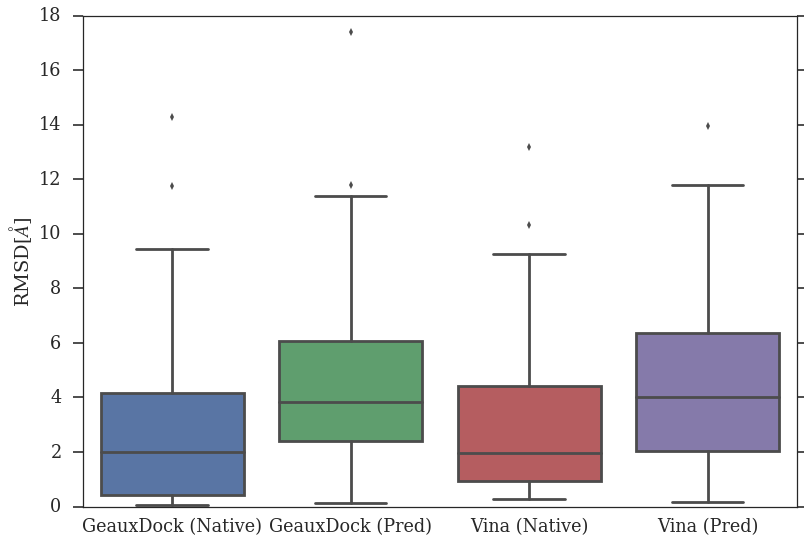

In [19]:
plt.figure()
sns.boxplot(data=df)
plt.ylabel("RMSD[$\AA$]")